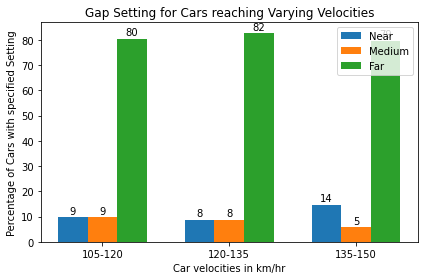

In [1]:
#import the classes we made
import LinkedList
import dataRead
#import the classes that plot
import numpy as np
import matplotlib.pyplot as plt
import math

#creates linked list 
valueList = LinkedList.LinkedList()
valueList = dataRead.readIn()

labels = ['105-120', '120-135', '135-150']

near = [0, 0, 0]
medium = [0, 0, 0]
far = [0, 0, 0]

#calculate the number of each near and far speeds
for Node in valueList:
	if(Node.setting == 'Near'):
		near[0] += Node.speed1
		near[1] += Node.speed2
		near[2] += Node.speed3
	elif(Node.setting == 'Medium'):
		medium[0] += Node.speed1
		medium[1] += Node.speed2
		medium[2] += Node.speed3
	elif(Node.setting == 'Far'):
		far[0] += Node.speed1
		far[1] += Node.speed2
		far[2] += Node.speed3

for i in range(3):
	totalSpeed = near[i] + medium[i] + far[i]

	near[i] = near[i] / totalSpeed * 100
	medium[i] = medium[i] / totalSpeed * 100
	far[i] = far[i] / totalSpeed * 100

x = np.arange(len(labels))  # the label locations
width = 0.7  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, near, width/3, label='Near')
rects2 = ax.bar(x , medium, width/3, label='Medium')
rects3 = ax.bar(x + width/3, far, width/3, label='Far')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Cars with specified Setting')
ax.set_xlabel('Car velocities in km/hr')
ax.set_title('Gap Setting for Cars reaching Varying Velocities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = math.trunc(rect.get_height())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
